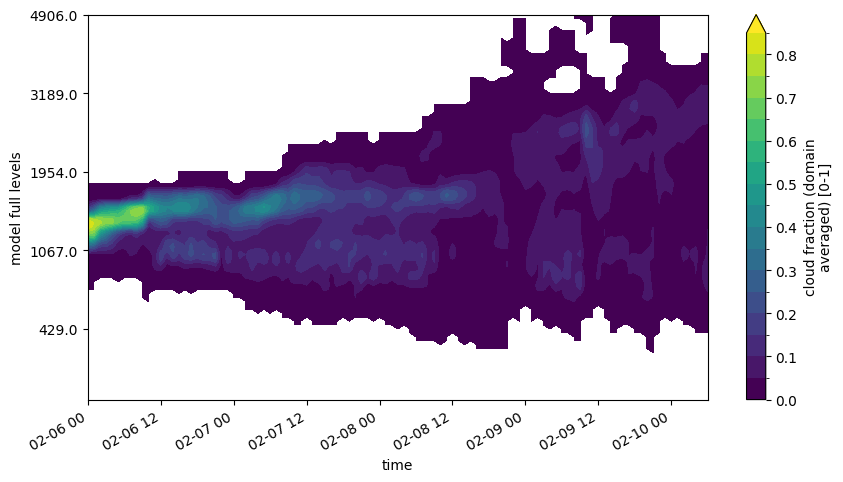

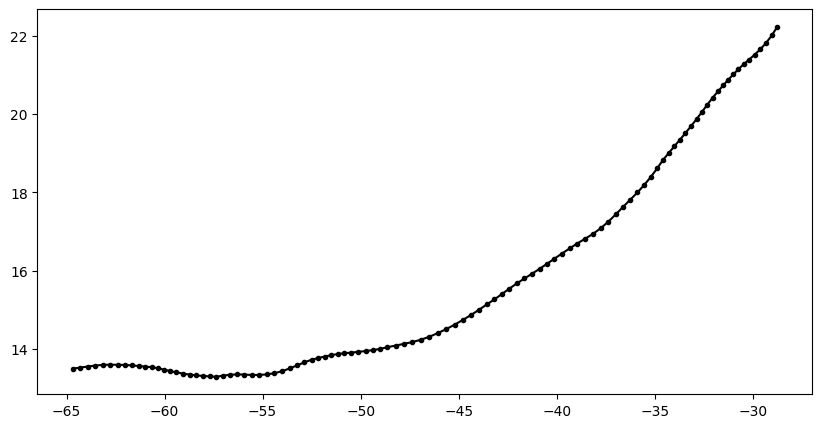

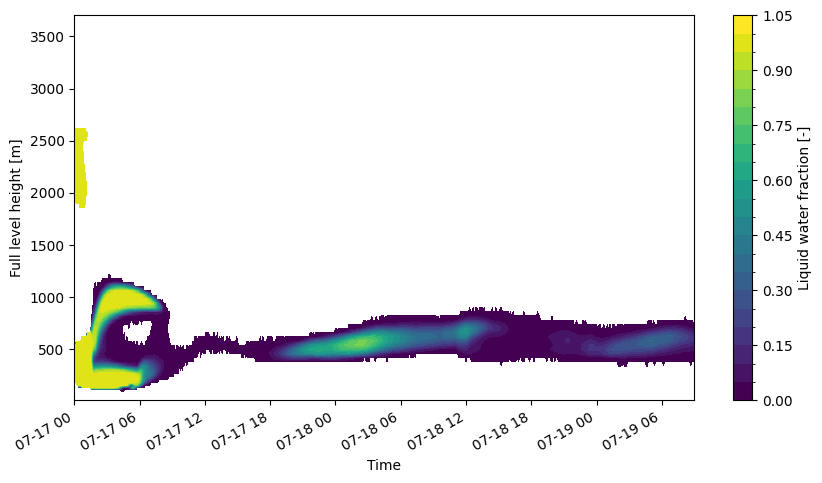

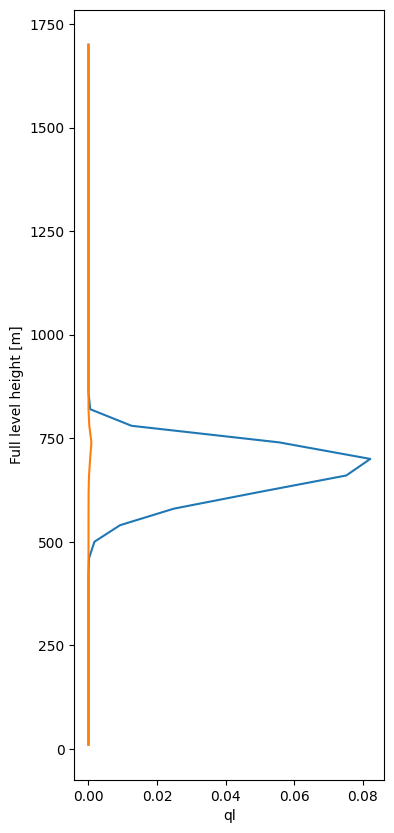

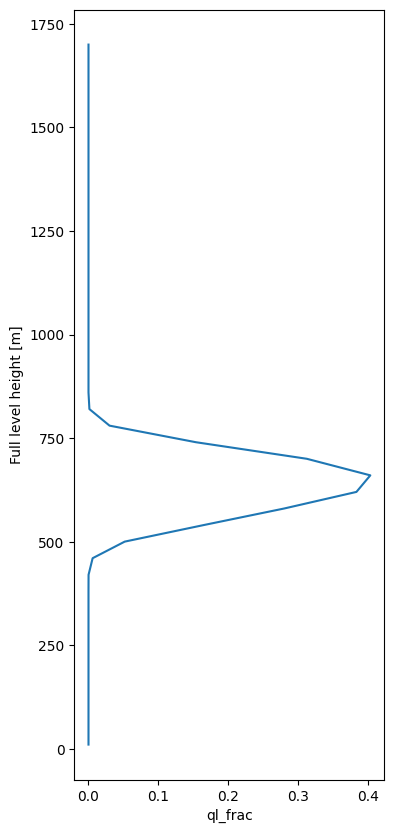

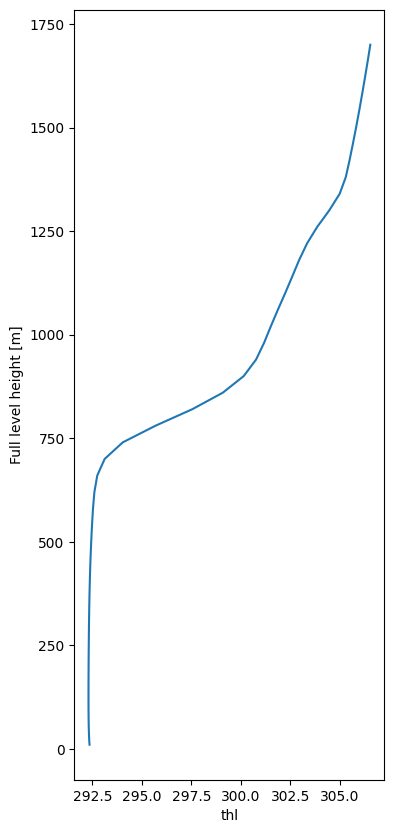

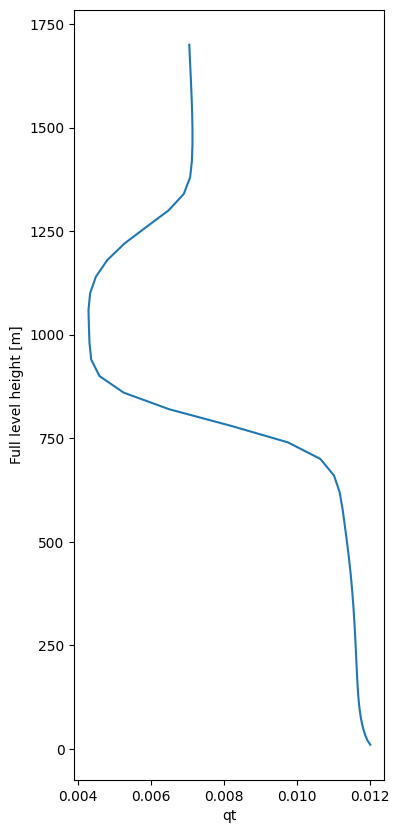

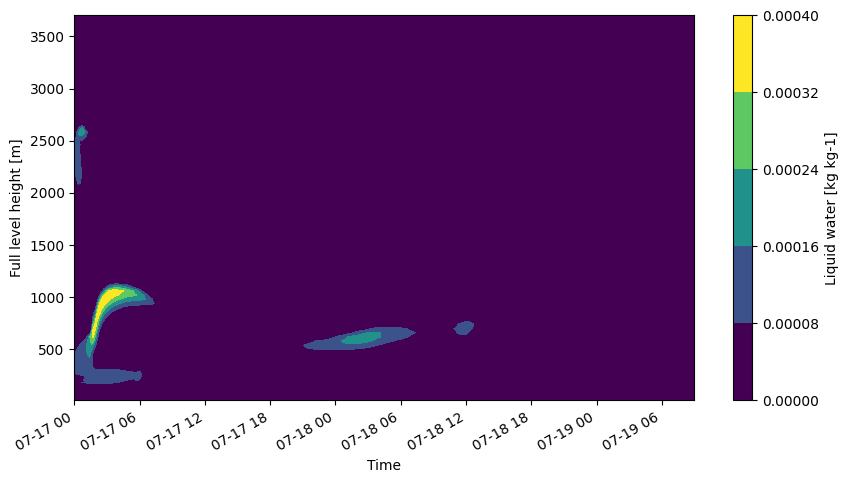

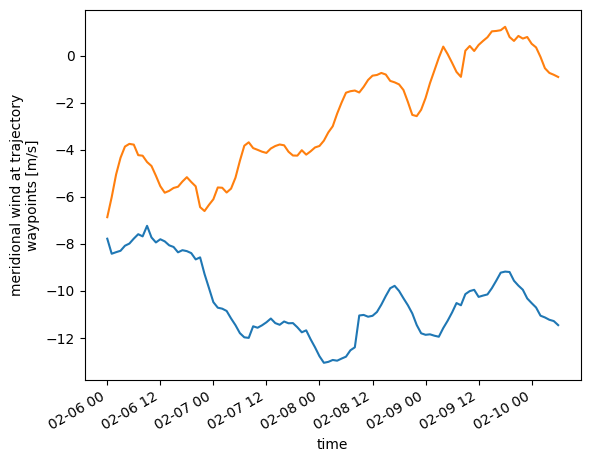

In [4]:
import numpy as np
import matplotlib.pyplot as pl
import netCDF4 as nc
import xarray as xr
from datetime import datetime
from netCDF4 import Dataset

forcing_directory = '/fs/ess/PFS0220/eurec4a/forcings/'
forcing_filename = 'eurec4a_20200209.kpt.nc'
#forcing_filename = 'eurec4a_20200202_narenpitak_extended.kpt_inversion.nc'
era_forcing = xr.open_dataset(forcing_directory+forcing_filename)

mhh_output_directory = '/fs/ess/PFS0220/ENA/case_july18th_2017_test/'
mhh_filename = 'ENA_lagrangian.512.default.0000000.nc'
mhh_output = xr.open_dataset(mhh_output_directory+mhh_filename,decode_times=True)
rootgroup = Dataset(mhh_output_directory+mhh_filename,"r")
for group in rootgroup.groups:
    mhh_output=xr.merge([mhh_output, xr.open_dataset(mhh_output_directory+mhh_filename,group=group,decode_times=True)])

# Plot the data
fig, ax = pl.subplots(figsize=(10, 5))
era_forcing['cloud_fraction']=era_forcing['cloud_fraction'].where(era_forcing['cloud_fraction']>0,np.nan)
(era_forcing['cloud_fraction']).isel(nlev=slice(150,None)).transpose().plot.contourf(levels=np.arange(0,0.9,0.05))
pl.gca().invert_yaxis()
pl.yticks(era_forcing['nlev'].isel(nlev=slice(150,None,20)).values[:],np.around(era_forcing['zf'].isel(time=0,nlev=slice(150,None,20)).values[:]))

fig, ax = pl.subplots(figsize=(10, 5))
pl.plot(era_forcing['lon'].values[:],era_forcing['lat'].values[:],'k.-')

fig, ax = pl.subplots(figsize=(10, 5))
mhh_output['ql_frac_plot']=mhh_output['ql_frac'].where(mhh_output['ql_frac']>0,np.nan)
mhh_output['ql_frac_plot'].isel(z=slice(0,100)).transpose().plot.contourf(levels=np.arange(0,1.1,0.05))

fig, ax = pl.subplots(figsize=(4, 10))
(mhh_output['ql'].isel(time=slice(33*12,36*12)).mean(dim=['time'])*1000).isel(z=slice(0,50)).plot.line(y='z',ax=ax)
(mhh_output['ql'].isel(time=slice(33*12,36*12)).var(dim=['time'])*1e6).isel(z=slice(0,50)).plot.line(y='z',ax=ax)

fig, ax = pl.subplots(figsize=(4, 10))
(mhh_output['ql_frac'].isel(time=slice(33*12,36*12)).mean(dim=['time'])).isel(z=slice(0,50)).plot.line(y='z',ax=ax)

fig, ax = pl.subplots(figsize=(4, 10))
(mhh_output['thl'].isel(time=slice(33*12,36*12)).mean(dim=['time'])).isel(z=slice(0,50)).plot.line(y='z',ax=ax)

fig, ax = pl.subplots(figsize=(4, 10))
(mhh_output['qt'].isel(time=slice(33*12,36*12)).mean(dim=['time'])).isel(z=slice(0,50)).plot.line(y='z',ax=ax)

fig, ax = pl.subplots(figsize=(10, 5))
mhh_output['ql'].isel(z=slice(0,100)).transpose().plot.contourf()

pl.figure()
era_forcing['u_traj'].plot()
era_forcing['v_traj'].plot()    